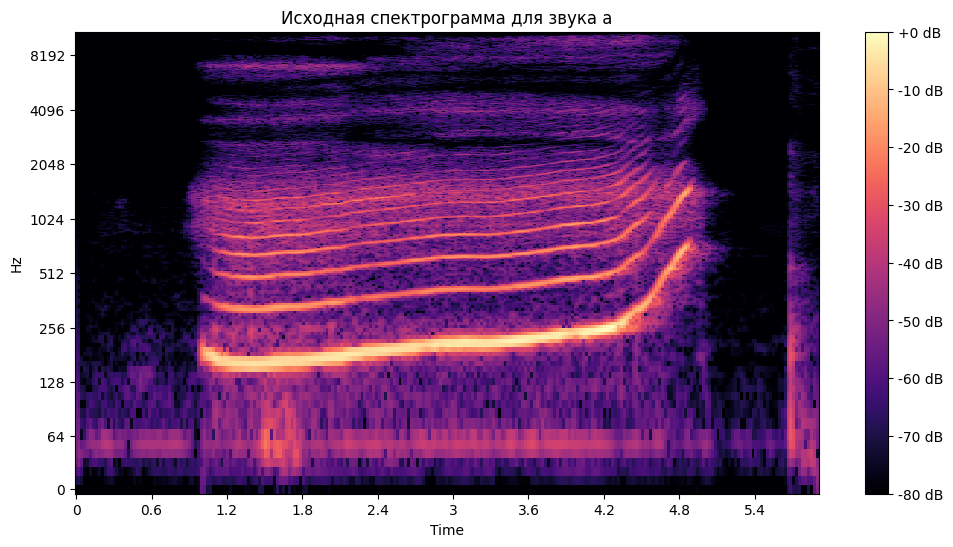

Минимальная частота голоса: 0.0 Гц
Максимальная частота голоса: 10605.1025390625 Гц
Основной тон: 258.3984375 Гц


c:\Users\Milana\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\Milana\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


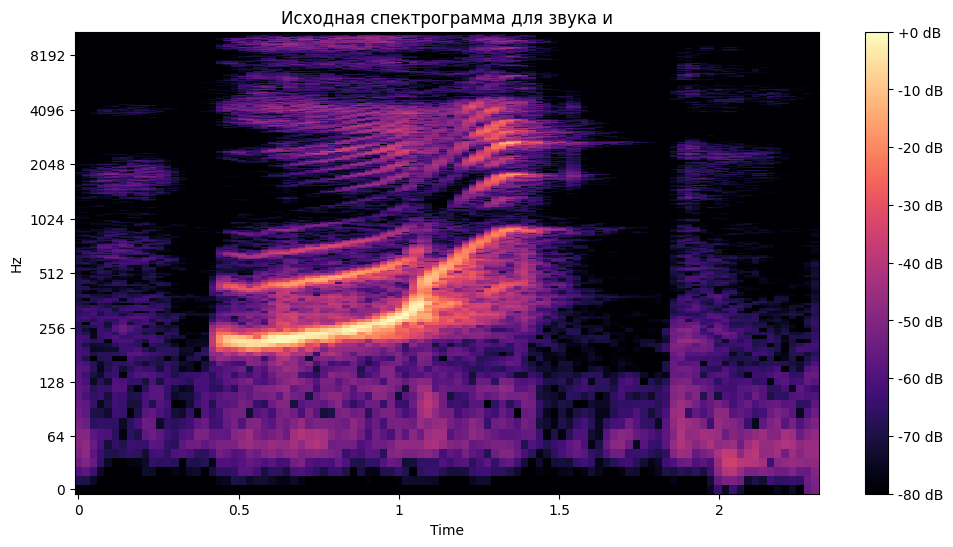

Минимальная частота голоса: 0.0 Гц
Максимальная частота голоса: 10562.0361328125 Гц
Основной тон: 290.6982421875 Гц


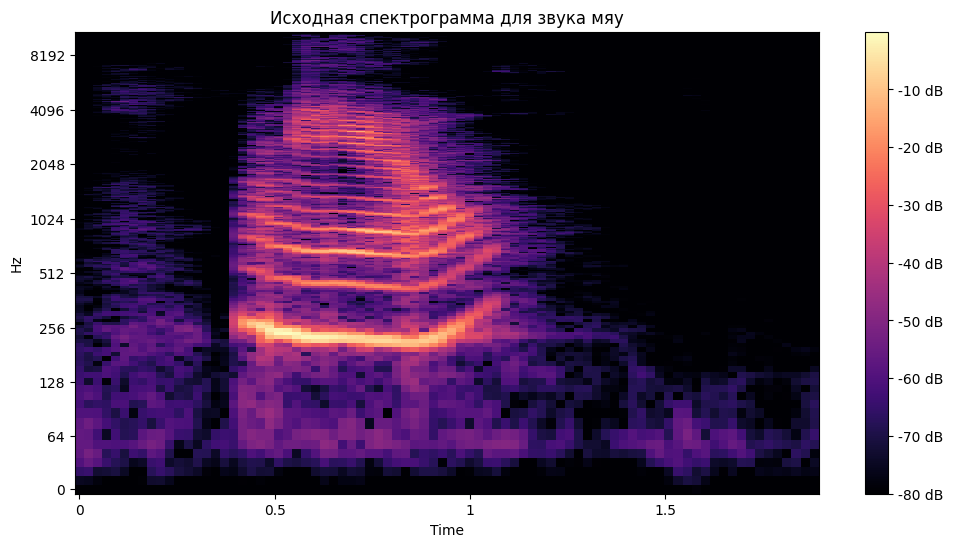

Минимальная частота голоса: 32.2998046875 Гц
Максимальная частота голоса: 10335.9375 Гц
Основной тон: 0.0 Гц


In [2]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

def main(smth=None):
    name_filename = ["A.wav", "I.wav", "meow.wav"]
    name_filename_1 = ["звука а", "звука и", "звука мяу"]

    for i in range(len(name_filename)):
      filename = name_filename[i]
      audio_data, sample_rate = librosa.load(filename)

      # Параметры Фурье
      n_fft = 2048
      hop_length = 512
      window = np.hanning(n_fft)

      # Вычисление спектрограммы
      stft = librosa.stft(audio_data, n_fft=n_fft, hop_length=hop_length, window=window)
      spectrogram = np.abs(stft)
      log_spectrogram = librosa.amplitude_to_db(spectrogram, ref=np.max)

      #исходная спектрограмма
      plt.figure(figsize=(12, 6))
      librosa.display.specshow(log_spectrogram, sr=sample_rate, x_axis='time', y_axis='log')
      plt.colorbar(format='%+2.0f dB')
      plt.title(f'Исходная спектрограмма для {name_filename_1[i]}')
      plt.savefig(f'spectrogram_{filename[:-4]}.png', bbox_inches='tight')
      plt.show()

      # мин и макс частоты голоса
      min_freq = np.min(np.where(log_spectrogram > -60)[0])
      max_freq = np.max(np.where(log_spectrogram > -60)[0])
      print(f"Минимальная частота голоса: {min_freq * sample_rate / n_fft} Гц")
      print(f"Максимальная частота голоса: {max_freq * sample_rate / n_fft} Гц")

      # основной тон
      harmonic_product_spectrum = np.prod(log_spectrogram, axis=1)
      fundamental_freq = np.argmax(harmonic_product_spectrum) * sample_rate / n_fft
      print(f"Основной тон: {fundamental_freq} Гц")

      # три форманты
      time_step = int(0.1 * sample_rate / hop_length)  # Шаг по времени в индексах
      freq_step = 10  # Шаг по частоте в Гц

      # разбиение на временные сегменты
      time_slices = range(0, log_spectrogram.shape[1], time_step)
      formants = []
      for i in range(len(time_slices) - 1):
          start = time_slices[i]
          end = time_slices[i + 1]
          segment = log_spectrogram[:, start:end]

          # Поиск трех пиков с наибольшей энергией в сегменте
          freq_bins = np.arange(segment.shape[0]) * sample_rate / n_fft
          peaks = np.argsort(np.max(segment, axis=1))[-3:]
          formants.append([freq_bins[peak] for peak in peaks])

      #print("Три самые сильные форманты:")
      #for i, formant in enumerate(formants):
          #print(f"Временной сегмент {i}: {[f'{freq:.0f} Гц' for freq in formant]}")

      for i, filename in enumerate(name_filename):
        with open(f"{filename[:-4]}_results.txt", "w", encoding="utf-8") as f:

            f.write(f"Результаты анализа звукового файла: {filename}\n\n")

            f.write(f"Минимальная частота голоса: {min_freq * sample_rate / n_fft} Гц\n")
            f.write(f"Максимальная частота голоса: {max_freq * sample_rate / n_fft} Гц\n\n")

            f.write(f"Основной тон: {fundamental_freq} Гц\n\n")

            f.write("Три самые сильные форманты:\n")
            for j, formant in enumerate(formants):
                f.write(f"Временной сегмент {j}: {[f'{freq:.0f} Гц' for freq in formant]}\n")

if __name__ == "__main__":
    main()